In [77]:
pip install ucimlrepo

In [78]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# Convert label dataframe to Series
y = y['income']

In [81]:
y = y.replace({'<=50K' : 0,
               '<=50K.' : 0,
               '>50K': 1,
               '>50K.' : 1})


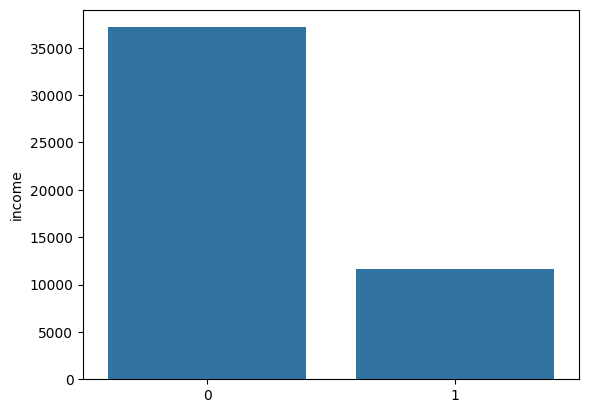

In [82]:
sns.barplot(y.value_counts())
plt.show()

Number of samples with income higher than 50K is lower than the ones with lower income. While doing the classification task, we need to adjust the parameters accordingly.

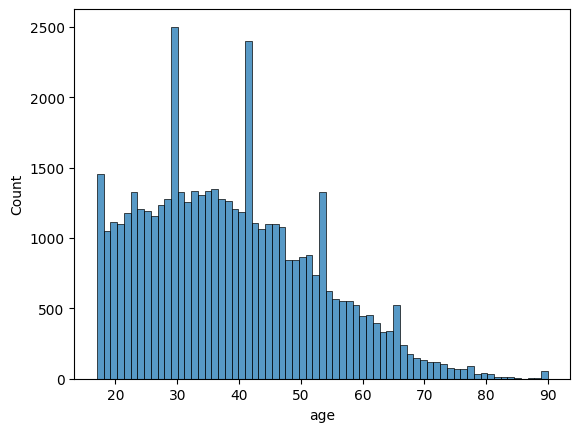

In [83]:
sns.histplot(X['age'])
plt.show()

Age has right skewed distribution. Since there is no linear relationship between income and age, binning the ages would work well.

In [84]:
X['age'].isnull().sum()

0

In [85]:
bins = [16, 30, 40, 50, 60, 70, 80, 91]
labels = ['17-30','30-40','40-50','50-60','60-70','70-80','80-90']

age_bins = pd.cut(X['age'], bins=bins, labels=labels)

X['age'] = age_bins

<ipython-input-85-1abac1975f9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = age_bins


In [86]:
X['age'].unique()

['30-40', '40-50', '50-60', '17-30', '70-80', '60-70', '80-90']
Categories (7, object): ['17-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80' < '80-90']

In [87]:
X['workclass'][X['workclass'] == '?'] = np.nan

<ipython-input-87-e07cec4d9191>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'][X['workclass'] == '?'] = np.nan


In [88]:
X['workclass'].isnull().sum()

2799

In [89]:
X['workclass'].fillna(X['workclass'].mode()[0], inplace = True)

<ipython-input-89-a23736fb5fe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].fillna(X['workclass'].mode()[0], inplace = True)


In [90]:
X['workclass'].isnull().sum()

0

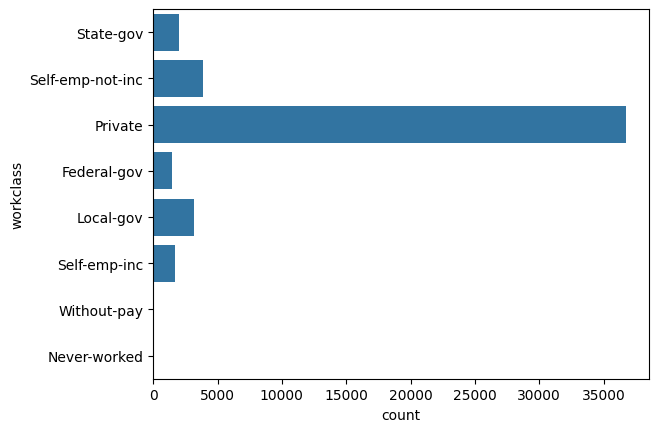

In [91]:
sns.countplot(X['workclass'])
plt.show()

In [92]:
X.drop('fnlwgt', axis = 1, inplace = True)

<ipython-input-92-507d12ba5449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('fnlwgt', axis = 1, inplace = True)


In [93]:
X.drop('education-num', axis = 1, inplace = True)

<ipython-input-93-abedc69074ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('education-num', axis = 1, inplace = True)


In [94]:
X['education'].isnull().sum()

0

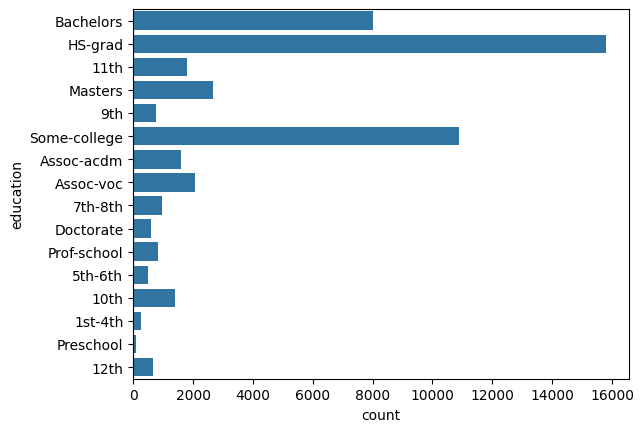

In [95]:
sns.countplot(X['education'])
plt.show()

In [96]:
X['marital-status'].isnull().sum()

0

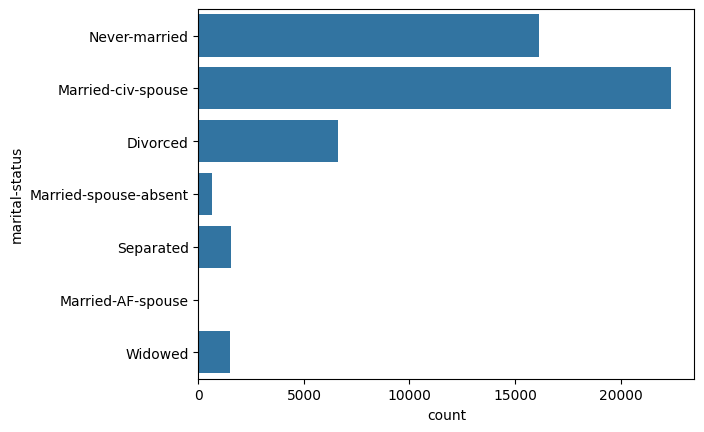

In [97]:
sns.countplot(X['marital-status'])
plt.show()

In [98]:
marital_condition = (X['marital-status'] == 'Married-civ-spouse') | (X['marital-status'] == 'Married-AF-spouse')
X['marital-status'][marital_condition] = 'Married'
X['marital-status'][~marital_condition] = 'Non-married'

<ipython-input-98-533b6f0e3f74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital-status'][marital_condition] = 'Married'
<ipython-input-98-533b6f0e3f74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital-status'][~marital_condition] = 'Non-married'


In [99]:
X['marital-status'].unique()

array(['Non-married', 'Married'], dtype=object)

In [100]:
X['occupation'].isnull().sum()

966

In [101]:
X['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [102]:
X['occupation'][X['occupation'] == '?'] = np.nan

<ipython-input-102-0ff5a6be819b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'][X['occupation'] == '?'] = np.nan


In [103]:
X['occupation'].fillna(X['occupation'].mode()[0], inplace = True)

<ipython-input-103-8223b0981089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'].fillna(X['occupation'].mode()[0], inplace = True)


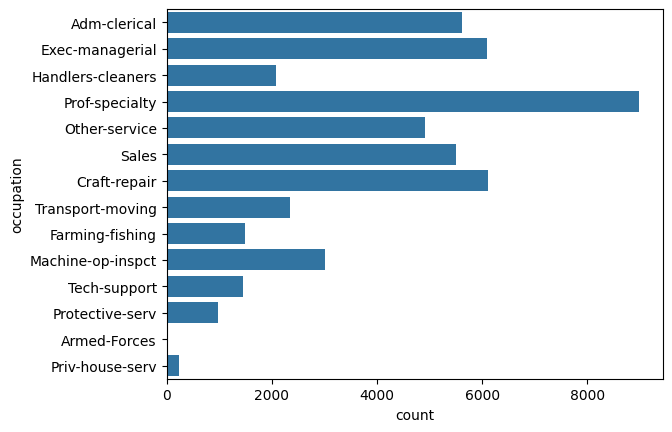

In [104]:
sns.countplot(X['occupation'])
plt.show()

In [105]:
X.drop('relationship', axis = 1, inplace = True)

<ipython-input-105-9446c559fa0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('relationship', axis = 1, inplace = True)


In [106]:
X['race'].isnull().sum()

0

In [107]:
X['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [108]:
X.drop('race', axis = 1, inplace=True)

<ipython-input-108-a8e6a2f33744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('race', axis = 1, inplace=True)


In [109]:
X['sex'].isnull().sum()

0

In [110]:
X['sex'].unique()

array(['Male', 'Female'], dtype=object)

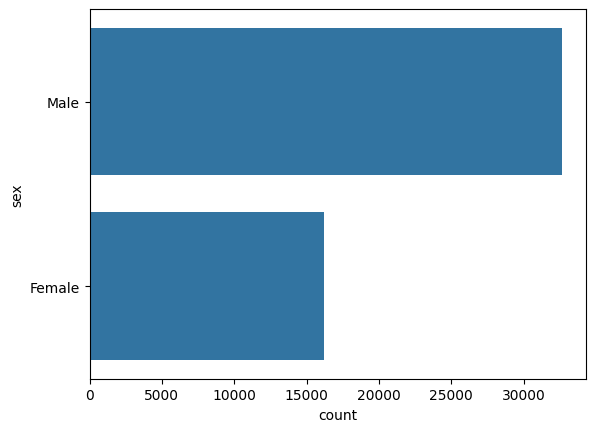

In [111]:
sns.countplot(X['sex'])
plt.show()

In [112]:
X.drop(['capital-gain', 'capital-loss'], axis = 1, inplace = True)

<ipython-input-112-f82714753c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['capital-gain', 'capital-loss'], axis = 1, inplace = True)


In [113]:
country_condition = (X['native-country'] == 'United-States')
X['native-country'][country_condition] = 'US'
X['native-country'][~country_condition] = 'Non-US'

<ipython-input-113-786d29dd4fbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'][country_condition] = 'US'
<ipython-input-113-786d29dd4fbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'][~country_condition] = 'Non-US'


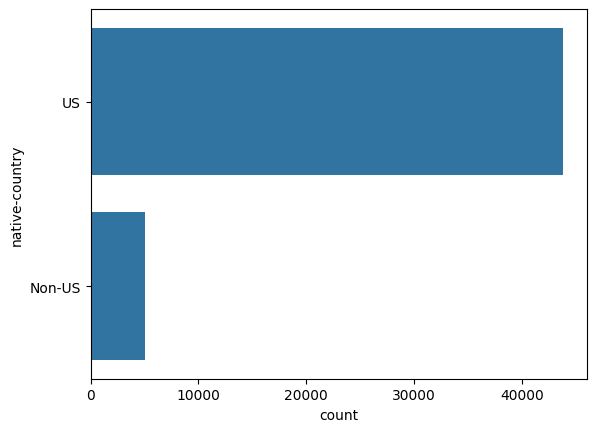

In [114]:
sns.countplot(X['native-country'])
plt.show()

In [115]:
X['hours-per-week'].isnull().sum()

0

In [116]:
X['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
82        1
87        1
69        1
Name: hours-per-week, Length: 96, dtype: int64

In [117]:
X

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,30-40,State-gov,Bachelors,Non-married,Adm-clerical,Male,40,US
1,40-50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Male,13,US
2,30-40,Private,HS-grad,Non-married,Handlers-cleaners,Male,40,US
3,50-60,Private,11th,Married,Handlers-cleaners,Male,40,US
4,17-30,Private,Bachelors,Married,Prof-specialty,Female,40,Non-US
...,...,...,...,...,...,...,...,...
48837,30-40,Private,Bachelors,Non-married,Prof-specialty,Female,36,US
48838,60-70,Private,HS-grad,Non-married,Prof-specialty,Male,40,US
48839,30-40,Private,Bachelors,Married,Prof-specialty,Male,50,US
48840,40-50,Private,Bachelors,Non-married,Adm-clerical,Male,40,US


In [118]:
columns_to_encode = np.delete(np.array(X.columns),6)

In [119]:
columns_to_encode

array(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'sex', 'native-country'], dtype=object)

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
for column in columns_to_encode:
  X[column] = LabelEncoder().fit_transform(X[column])

<ipython-input-121-eb3990b46578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = LabelEncoder().fit_transform(X[column])
<ipython-input-121-eb3990b46578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = LabelEncoder().fit_transform(X[column])
<ipython-input-121-eb3990b46578>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaled_X_array = MinMaxScaler().fit_transform(X)

In [125]:
scaled_X = pd.DataFrame(scaled_X_array, columns=X.columns)

In [127]:
from sklearn.model_selection import train_test_split

In [241]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, random_state = 123)

In [242]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support

In [280]:
def train(X_train, units, activation1, activation2, learning_rate, loss, epochs, batch_size):
  model = Sequential()
  model.add(Dense(units = units, activation = activation1, input_shape=(len(X_train.columns), )))
  model.add(Dense(1, activation = activation2))
  adam = keras.optimizers.Adam(learning_rate = learning_rate)
  model.compile(loss=loss, optimizer=adam, metrics=["accuracy"])
  model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size)
  return model
def evaluate(X_test, model, threshold):
  loss_and_metrics = model.evaluate(X_test, y_test)
  print(loss_and_metrics)
  print('Loss = ',loss_and_metrics[0])
  probabilities = model.predict(X_test)
  probabilities_tensor = tf.squeeze(probabilities)
  predicted = np.array([1 if x >= threshold else 0 for x in probabilities_tensor])
  real = np.array(y_test)
  precision, recall, f1, support = precision_recall_fscore_support(real, predicted)
  accuracy = np.mean(real == predicted)
  print("Precision:", precision)
  print("Recall:", recall)
  print("Accuracy:", accuracy)
  print("F1 Score:", f1)
  return real, probabilities, predicted
def plot_conf(real, predicted):
  conf_mat = confusion_matrix(real, predicted)
  displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
  displ.plot()
def plot_auc(real, probabilities):
  fpr, tpr, _ = roc_curve(real, probabilities)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()

In [302]:
units = 16 # 16 > 8
activation1 = 'relu'
activation2 = 'sigmoid'
learning_rate = 0.05 # 0.01 > 0.001
loss = 'binary_crossentropy' #
epochs = 5 # 5 > 10
threshold = 0.2 # 0.2 is the best threshold
batch_size = 256

In [303]:
model = train(X_train, units, activation1, activation2, learning_rate, loss, epochs, batch_size)

Epoch 1/5
144/144 [==============================] - 2s 3ms/step - loss: 0.4298 - accuracy: 0.7660
Epoch 2/5
144/144 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.7886
Epoch 3/5
144/144 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.7914
Epoch 4/5
144/144 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.7924
Epoch 5/5
144/144 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.7943


In [304]:
real, probabilities, predicted = evaluate(X_test, model, threshold)

382/382 [==============================] - 1s 2ms/step - loss: 0.3947 - accuracy: 0.7973
[0.39470696449279785, 0.7973138689994812]
Loss =  0.39470696449279785
382/382 [==============================] - 1s 1ms/step
Precision: [0.94433724 0.46455974]
Recall: [0.68460131 0.87148732]
Accuracy: 0.7292605028253214
F1 Score: [0.7937617  0.60605338]


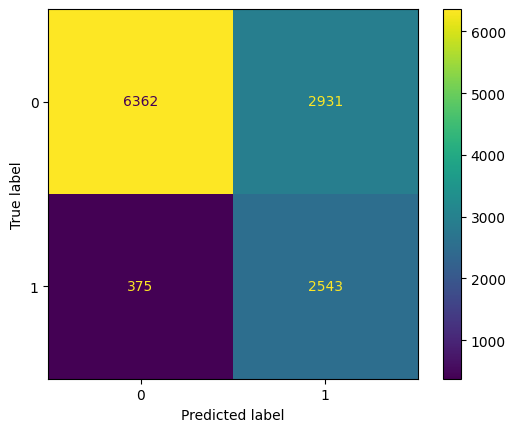

In [305]:
plot_conf(real, predicted)

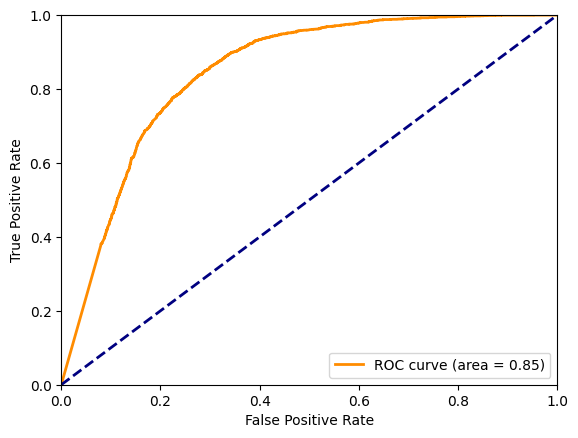

In [306]:
plot_auc(real, probabilities)

# Conclusion

In this project, features was the age, education, marital status etc. and the label was a binary label which is income. 0 if income is lower or equal thah 50K, 1 otherwise.

Categorical data was encoded and whole data was scaled.

Using tensorflow, a model was trained and hyperparameters are tuned. As activation function, 'relu' and 'sigmoid' were used. Sigmoid function is used on output layer because it works better with binary labels. 16 units, 0.01 learning rate, binary crossentropy loss and 10 epochs are used as hyperparameters.

Threshold was 0.5 at the beginning, but false negatives were too high. Model showed a poor performance determining people that earns more than 50K. So threshold is decreased to 0.2, it worked better.

Introducing batch_size strongly increased the performance.

As a result, 0.39 loss and 0.73 test accuracy is achieved.